# Heart Disease Model
---
13516013 - Azka Nabilah Mumtaz <br>
13516062 - Yusuf Rahmat Pratama<br>
13516095 - Faza Fahleraz<br>
13516101 - Kelvin Kristian<br>
13516102 - Steven Sukma Limanus



In [55]:
import pandas as pd
import numpy as np

## Data Preparation & Preprocessing
---
Training data for health disease is read using Pandas' `read_csv()` and `read_excel()` method, and is preprocessed as such to be ready to fit into the learning model.

### Data information
The description file is read here. The file describes each of the data's attributes and their respective domains. From the description, it can be seen that for the attributes in Column 2, Column 3, Column 6, Column 7, Column 9, Column 11, Column 12, and Column 13 has a discrete value range, and discrete values for other attributes. Column 14 contains the label for the data, therefore the most suitable learning method is Supervised Learning.

In [56]:
# data_info = pd.read_excel('../data/description.xlsx', header=1)
# data_info.fillna('-', inplace=True)
# data_info

### Load data
Training data are read and the data are split between features and labels. The resulting data read are 13 columns as attributes and 1 column as label. A total of 779 rows are read.

In [146]:
train = pd.read_csv('../data/tubes2_HeartDisease_train.csv')
train.columns = ['age', 'sex', 'chest_pain_type', 'rest_blood_pressure', 'serum_cholestrol', 
                 'high_fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina',
                 'st_depression', 'peak_exercise_st', 'major_vessels_num', 'thal', 'diagnosis']
train_x = train.iloc[:, :13]
train_y = train.iloc[:, 13:]

train_x.head()

,age,sex,chest_pain_type,rest_blood_pressure,serum_cholestrol,high_fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,peak_exercise_st,major_vessels_num,thal
0,54,1,4,125,216,0,0,140,0,0,?,?,?
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?
2,54,0,3,135,304,1,0,170,0,0,1,0,3
3,48,0,3,120,195,0,0,125,0,0,?,?,?
4,50,1,4,120,0,0,1,156,1,0,1,?,6


### Preprocessing

#### Handle missing values
Some data contain unknown value in some of their attributes, therefore needed to be processed. 

The string '?' that represents the unknown value is replaced with NaN to make data uniformly numeric, and all data are cast into float to process NaN as well (NaN is represented as float in Numpy). 

In [147]:
train_x = train_x.replace('?', np.nan).astype(float)

For now, mean of each attributes is used to input value to the unknown-valued data for the free-discrete attributes, and mode of each attributes is used for the ranged discrete attributes.

In [148]:
categorical_attributes = ["sex", "chest_pain_type", "high_fasting_blood_sugar", "resting_ecg", "exercise_induced_angina", "peak_exercise_st", "major_vessels_num", "thal"]
series_attributes = ["age", "rest_blood_pressure", "serum_cholestrol", "max_heart_rate", "st_depression"]

train_x[categorical_attributes] = train_x[categorical_attributes].fillna(train_x.mode().iloc[0])
train_x[series_attributes] = train_x[series_attributes].fillna(train_x.mean())
train_x[categorical_attributes] = train_x[categorical_attributes].astype('category')

train_x_original = train_x.copy()
train_y_original = train_y.copy()

train_x.head()

,age,sex,chest_pain_type,rest_blood_pressure,serum_cholestrol,high_fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,peak_exercise_st,major_vessels_num,thal
0,54.0,1.0,4.0,125.0,216.0,0.0,0.0,140.0,0.0,0.0,2.0,0.0,3.0
1,55.0,1.0,4.0,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,0.0,3.0
2,54.0,0.0,3.0,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0
3,48.0,0.0,3.0,120.0,195.0,0.0,0.0,125.0,0.0,0.0,2.0,0.0,3.0
4,50.0,1.0,4.0,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,0.0,6.0


#### (UNUSED) Drop columns with lots of missing values

Feature columns with a high number of missing values are dropped to ease the model's learning.

In [145]:
# train_x = train_x.drop('thal', 1)
# train_x = train_x.drop('major_vessels_num', 1)

# train_x.head()

#### Use One-Hot Encoding for Categorical Data

In [149]:
# train_x = pd.get_dummies(train_x, prefix=[
#     "sex", "chest_pain_type", "high_fasting_blood_sugar", "resting_ecg", 
#     "exercise_induced_angina", "peak_exercise_st"])

train_x = pd.get_dummies(train_x, prefix=[
    "sex", "chest_pain_type", "high_fasting_blood_sugar", "resting_ecg", 
    "exercise_induced_angina", "peak_exercise_st", "major_vessels_num", "thal"])

train_x = train_x.assign(serum_cholestrol_0 = np.select([train_x['serum_cholestrol'] == 0], [1], default=0))

train_x.head()

,age,rest_blood_pressure,serum_cholestrol,max_heart_rate,st_depression,sex_0.0,sex_1.0,chest_pain_type_1.0,chest_pain_type_2.0,chest_pain_type_3.0,...,peak_exercise_st_2.0,peak_exercise_st_3.0,major_vessels_num_0.0,major_vessels_num_1.0,major_vessels_num_2.0,major_vessels_num_3.0,thal_3.0,thal_6.0,thal_7.0,serum_cholestrol_0
0,54.0,125.0,216.0,140.0,0.0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,55.0,158.0,217.0,110.0,2.5,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,54.0,135.0,304.0,170.0,0.0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,48.0,120.0,195.0,125.0,0.0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
4,50.0,120.0,0.0,156.0,0.0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


#### Oversampling Procedure

Artificially increase the number of minority data by duplicating rows to get a more balanced dataset.

In [150]:
def oversample_label(train_x, train_y):
    diag_2 = train_y['diagnosis'] == 2
    train_x_diag_2 = train_x[diag_2]
    train_y_diag_2 = train_y[diag_2]
    train_x_oversampled = train_x.append([train_x_diag_2] * 2, ignore_index=True)
    train_y_oversampled = train_y.append([train_y_diag_2] * 2, ignore_index=True)

    diag_3 = train_y['diagnosis'] == 3
    train_x_diag_3 = train_x[diag_3]
    train_y_diag_3 = train_y[diag_3]
    train_x_oversampled = train_x_oversampled.append([train_x_diag_3] * 2, ignore_index=True)
    train_y_oversampled = train_y_oversampled.append([train_y_diag_3] * 2, ignore_index=True)

    diag_4 = train_y['diagnosis'] == 4
    train_x_diag_4 = train_x[diag_4]
    train_y_diag_4 = train_y[diag_4]
    train_x_oversampled = train_x.append([train_x_diag_4] * 3, ignore_index=True)
    train_y_oversampled = train_y.append([train_y_diag_4] * 3, ignore_index=True)

    assert(train_x_oversampled.count()[0] == train_y_oversampled.count()[0])

    train_x_preprocessed = train_x_oversampled.copy()
    train_y_preprocessed = train_y_oversampled.copy()
    return train_x_preprocessed, train_y_preprocessed

# train_x_preprocessed = train_x.copy()
# train_y_preprocessed = train_y.copy()

## Training Model
---

Here the training data is fitted into a model which will represent the hypothesis model of the learning method used. As the data is labelled discretely, classification models are suitable for the data. For this testing, we will use Native Bayesian, kNN (k-Nearest Neighbor), DTL (Decision Tree Learning), and MLP (Multi-layered Perceptron).

In [151]:
import itertools
import warnings
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.base import clone
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')

### Helpers

In [152]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Training Procedure
For training data and measuring the model prediction performance, we use **100-Fold Cross Validation** testing schema, in which the training data is iterated 100 times, with each iteration splitting the data as testing data and training data, fitting the model with the training data and checking the prediction with the testing data 

In [153]:
def prepare_and_execute_train_data(model, X, y, n_split=100):
    kf = KFold(n_splits = n_split)
    
    curr_model = clone(model)
    
    curr_fold = 1
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    total_confusion_matrix = None
    
    for train_index, test_index in kf.split(X, y):
        X_train, y_train = oversample_label(X.ix[train_index], y.ix[train_index])
        X_test, y_test = oversample_label(X.ix[test_index], y.ix[test_index])
        X_train = np.array(X_train)
        X_test = np.array(X_test)
        y_train = np.array(y_train)
        y_test = np.array(y_test)
#         X_train = np.array(X.ix[train_index])
#         X_test = np.array(X.ix[test_index])
#         y_train = np.array(y.ix[train_index])
#         y_test = np.array(y.ix[test_index])
        
        curr_model.fit(X_train, y_train)
        
        curr_prediction = curr_model.predict(X_test)
        
        curr_accuracy = accuracy_score(y_test, curr_prediction)
        curr_precision = precision_score(y_test, curr_prediction, average='macro')
        curr_recall = recall_score(y_test, curr_prediction, average='macro')
        
        if total_confusion_matrix is not None:
            total_confusion_matrix += confusion_matrix(y_test, curr_prediction)
        else:
            total_confusion_matrix = confusion_matrix(y_test, curr_prediction)
        
        accuracy_scores.append(curr_accuracy)
        precision_scores.append(curr_precision)
        recall_scores.append(curr_recall)
        
        curr_fold += 1
    
    print('\nMean Prediction Peformance: ')
    print('Mean Accuracy:     ', np.mean(accuracy_scores))
    print('Mean Precision:    ', np.mean(precision_scores))
    print('Mean Recall:       ', np.mean(recall_scores))
    plt.figure()
    plot_confusion_matrix(total_confusion_matrix, classes=[0, 1, 2, 3, 4], normalize=True,
            title='Normalized confusion matrix')
    
    model = curr_model

##### Native Bayesian
Here the Gaussian Native Bayesian Classifier is used to fit the learning model.


Mean Prediction Peformance: 
Mean Accuracy:      0.521986599192188
Mean Precision:     0.38151756737081405
Mean Recall:        0.36871720004696673

Mean Prediction Peformance: 
Mean Accuracy:      0.48911058815406133
Mean Precision:     0.33174486971663963
Mean Recall:        0.3721331550642236


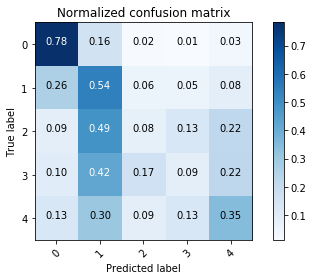

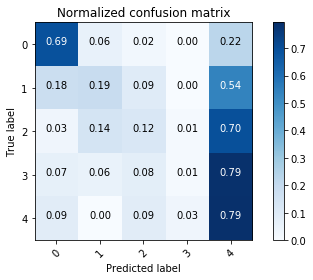

In [100]:
nb_og = GaussianNB()
prepare_and_execute_train_data(nb_og, train_x_original, train_y_original, 5)

nb = GaussianNB()
prepare_and_execute_train_data(nb, train_x_preprocessed, train_y_preprocessed, 5)

##### Decision Tree Learning
The Decision Tree Classifier model is used to fit the learning model.


Mean Prediction Peformance: 
Mean Accuracy:      0.564861162625737
Mean Precision:     0.44737505464868804
Mean Recall:        0.4784814399753839


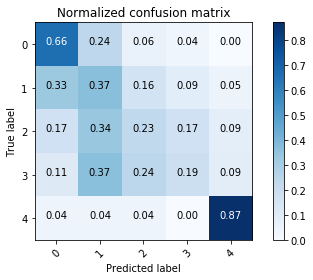

In [101]:
dtc = tree.DecisionTreeClassifier()
prepare_and_execute_train_data(dtc, train_x_preprocessed, train_y_preprocessed, 5)

##### k-Nearest Neighbor
The KNN Classifier is used to fit the learning model


Mean Prediction Peformance: 
Mean Accuracy:      0.5684942919133166
Mean Precision:     0.4359541804499448
Mean Recall:        0.44316259967425803


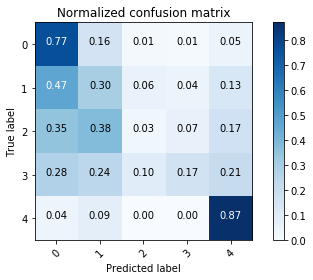

In [102]:
knn = KNeighborsClassifier()
prepare_and_execute_train_data(knn, train_x_preprocessed, train_y_preprocessed, 5)

##### Multi-layered Perceptron
Here the MLP Classifier is used to fit the learning model.


Mean Prediction Peformance: 
Mean Accuracy:      0.48689698842342705
Mean Precision:     0.3618420043519776
Mean Recall:        0.36011228922932903

Mean Prediction Peformance: 
Mean Accuracy:      0.6079778264577371
Mean Precision:     0.452998006888986
Mean Recall:        0.4974517029961036


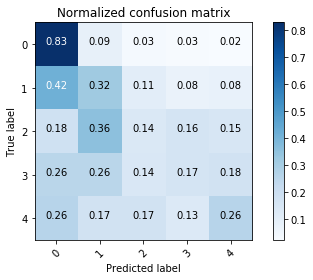

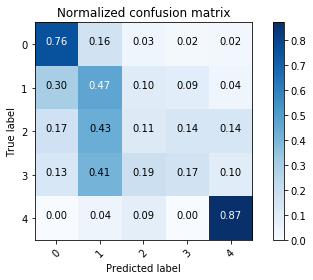

In [154]:
mlp_og = MLPClassifier(max_iter=1000)
prepare_and_execute_train_data(mlp_og, train_x_original, train_y_original, 5)

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=2000,
                    hidden_layer_sizes=(200, 80))
prepare_and_execute_train_data(mlp, train_x_preprocessed, train_y_preprocessed, 5)

## Model Finalization and Export
---
The model with the best prediction performance is chosen and exported as a Sklearn model for use in predicting (classifying) test data.

In [70]:
from sklearn.externals import joblib

##### Choose the best-scored model
The model with the best prediction performance is finalized and ready to be exported here.

In [ ]:
chosen_model = []
chosen_model

##### Export model to external file
Here the finalized model is dumped into an external file using sklearn's joblib method. The exported model will be saved and can be used to predict the test data.

In [ ]:
joblib.dump(chosen_model, '../models/heart_disease.joblib', compress=1)